# Load libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, norm, geom, uniform, lognorm

In [3]:
# define useful variables
timesteps = np.arange(0, 61)
timesteps

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

# Create a survival curve


**Questions:**

3. Modify the parameters of each survival curve, and try to understand how it influences the curve
4. What do the numbers on the y-axis of the plots below represent?


## Fixed lifetime


<Axes: >

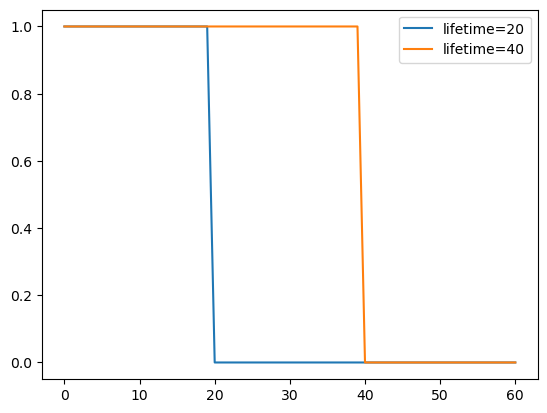

In [4]:
# Fixed lifetime survival curve
fixed_lifetime = 20  # controls the width (ending point)
curve_surv_1 = np.ones_like(timesteps)
curve_surv_1[fixed_lifetime:] = 0

fixed_lifetime = 40  # controls the width (ending point)
curve_surv_2 = np.ones_like(timesteps)
curve_surv_2[fixed_lifetime:] = 0

# Compare the two survival curves
pd.DataFrame({"lifetime=20": curve_surv_1, "lifetime=40": curve_surv_2}).plot()

## Uniform distribution


<Axes: >

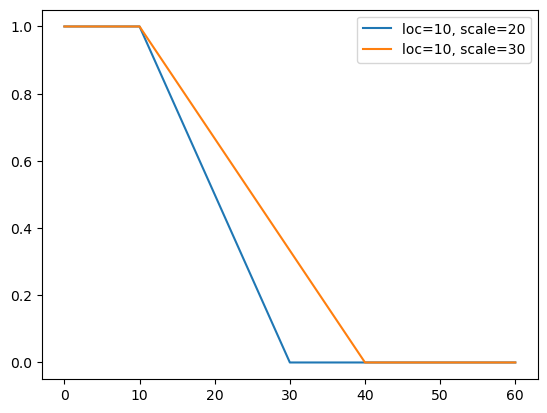

In [5]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform

curve_surv_1 = uniform.sf(
    timesteps,
    loc=10,  # shifts the curve along the x-axis (starting point)
    scale=20,  # controls the width (ending point)
)

curve_surv_2 = uniform.sf(
    timesteps,
    loc=10,  # shifts the curve along the x-axis (starting point)
    scale=30,  # controls the width (ending point)
)

# Compare the two survival curves
pd.DataFrame({"loc=10, scale=20": curve_surv_1, "loc=10, scale=30": curve_surv_2}).plot()

<Axes: >

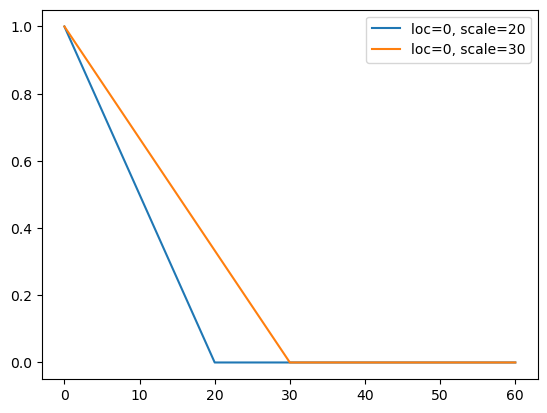

In [6]:
curve_surv_1 = uniform.sf(
    timesteps,
    loc=0,  # shifts the curve along the x-axis (starting point)
    scale=20,  # controls the width (ending point)
)

curve_surv_2 = uniform.sf(
    timesteps,
    loc=0,  # shifts the curve along the x-axis (starting point)
    scale=30,  # controls the width (ending point)
)

# Compare the two survival curves
pd.DataFrame({"loc=0, scale=20": curve_surv_1, "loc=0, scale=30": curve_surv_2}).plot()

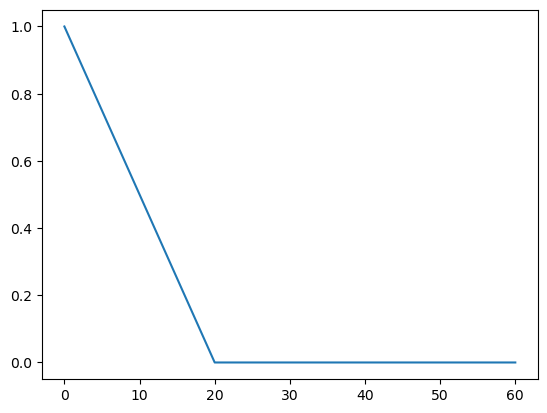

In [7]:
# ! Note:
# we can also define the distribution based on the depreciation rate (i.e. the slope)
depreciation_rate = 0.05
curve_surv = uniform.sf(
    timesteps,
    loc=0,  # shifts the curve along the x-axis (starting point)
    scale=1 / depreciation_rate,  # controls the width (based on the slope)
)

plt.plot(curve_surv)
plt.show()

## Geometric distribution


<Axes: >

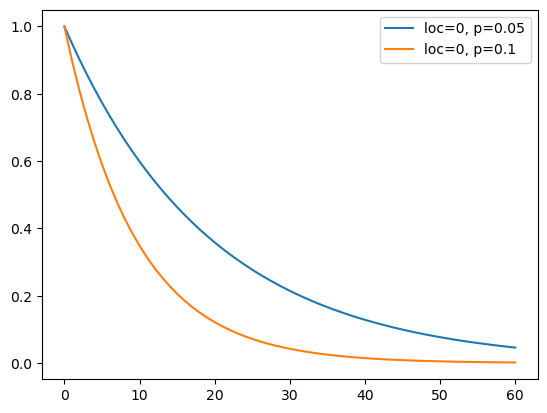

In [8]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom

curve_surv_1 = geom.sf(
    timesteps,
    p=0.05,  # controls the depreciation rate
    loc=0,  # shifts the curve along the x-axis (starting point)
)

curve_surv_2 = geom.sf(
    timesteps,
    p=0.1,  # controls the depreciation rate
    loc=0,  # shifts the curve along the x-axis (starting point)
)

# Compare the two survival curves
pd.DataFrame({"loc=0, p=0.05": curve_surv_1, "loc=0, p=0.1": curve_surv_2}).plot()

<Axes: >

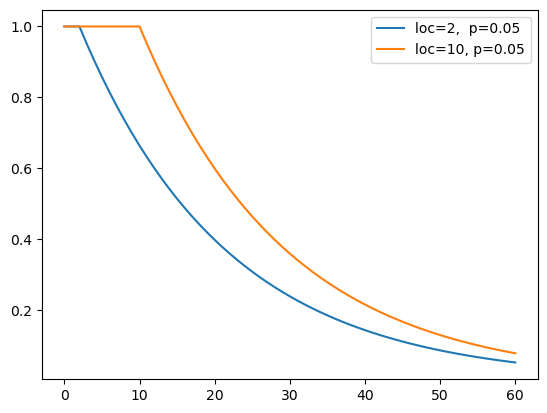

In [9]:
curve_surv_1 = geom.sf(
    timesteps,
    p=0.05,  # controls the depreciation rate
    loc=2,  # shifts the curve along the x-axis (starting point)
)

curve_surv_2 = geom.sf(
    timesteps,
    p=0.05,  # controls the depreciation rate
    loc=10,  # shifts the curve along the x-axis (starting point)
)

# Compare the two survival curves
pd.DataFrame({"loc=2,  p=0.05": curve_surv_1, "loc=10, p=0.05": curve_surv_2}).plot()

## Normal distribution


<Axes: >

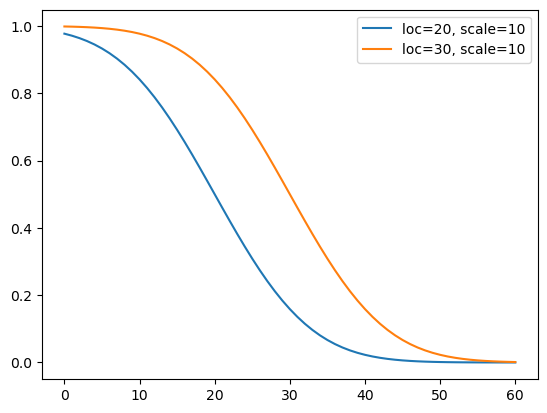

In [10]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm

curve_surv_1 = norm.sf(
    timesteps,
    loc=20,  # shifts the center of the curve (mean point)
    scale=10,  # Controls the spread of the curve (standard deviation)
)

curve_surv_2 = norm.sf(
    timesteps,
    loc=30,  # shifts the center of the curve (mean point)
    scale=10,  # Controls the spread of the curve (standard deviation)
)

# Compare the two survival curves
pd.DataFrame({"loc=20, scale=10": curve_surv_1, "loc=30, scale=10": curve_surv_2}).plot()

<Axes: >

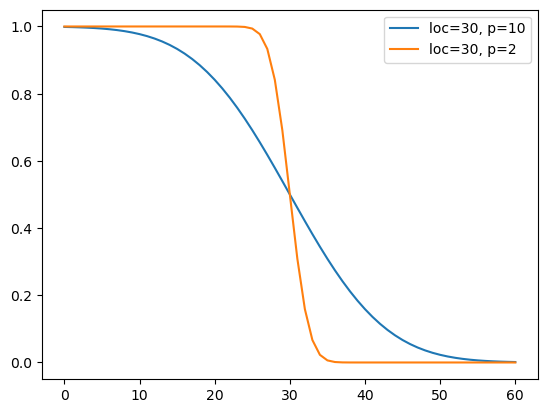

In [11]:
curve_surv_1 = norm.sf(
    timesteps,
    loc=30,  # shifts the center of the curve (mean point)
    scale=10,  # Controls the spread of the curve (standard deviation)
)

curve_surv_2 = norm.sf(
    timesteps,
    loc=30,  # shifts the center of the curve (mean point)
    scale=2,  # Controls the spread of the curve (standard deviation)
)

# Compare the two survival curves
pd.DataFrame({"loc=30, p=10": curve_surv_1, "loc=30, p=2": curve_surv_2}).plot()

## Weibull distribution


<Axes: >

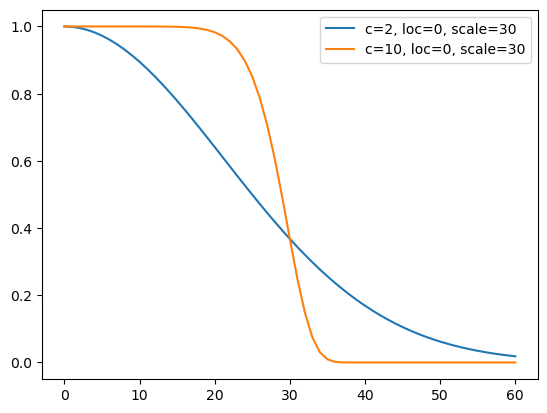

In [12]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weibull_min.html

curve_surv_1 = weibull_min.sf(
    timesteps,
    c=2,  # controls the shape of the curve (skewness)
    loc=0,  # shifts the curve along the x-axis (starting point)
    scale=30,  # Stretches or compresses the curve along the x-axis (spread)
)

curve_surv_2 = weibull_min.sf(
    timesteps,
    c=10,  # controls the shape of the curve (skewness)
    loc=0,  # shifts the curve along the x-axis (starting point)
    scale=30,  # Stretches or compresses the curve along the x-axis (spread)
)

# Compare the two survival curves
pd.DataFrame({"c=2, loc=0, scale=30": curve_surv_1, "c=10, loc=0, scale=30": curve_surv_2}).plot()

<Axes: >

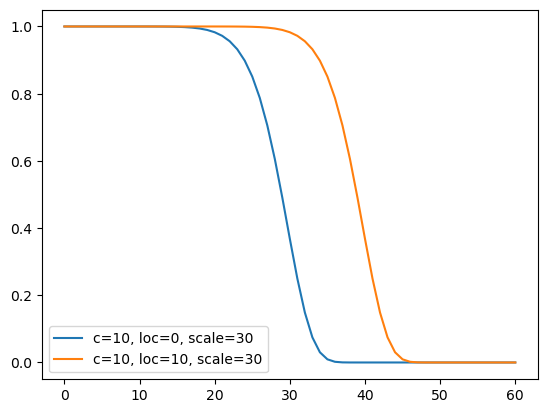

In [13]:
curve_surv_1 = weibull_min.sf(
    timesteps,
    c=10,  # controls the shape of the curve (skewness)
    loc=0,  # shifts the curve along the x-axis (starting point)
    scale=30,  # Stretches or compresses the curve along the x-axis (spread)
)

curve_surv_2 = weibull_min.sf(
    timesteps,
    c=10,  # controls the shape of the curve (skewness)
    loc=10,  # shifts the curve along the x-axis (starting point)
    scale=30,  # Stretches or compresses the curve along the x-axis (spread)
)

# Compare the two survival curves
pd.DataFrame({"c=10, loc=0, scale=30": curve_surv_1, "c=10, loc=10, scale=30": curve_surv_2}).plot()

<Axes: >

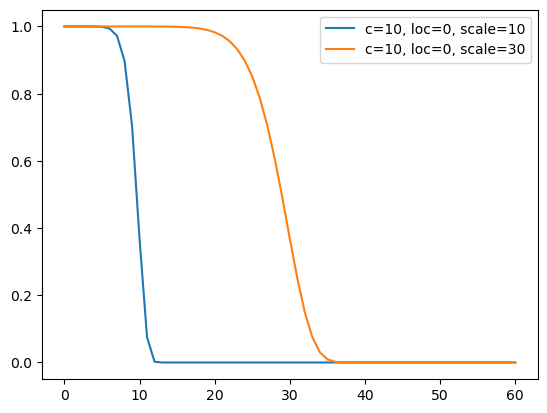

In [14]:
curve_surv_1 = weibull_min.sf(
    timesteps,
    c=10,  # controls the shape of the curve (skewness)
    loc=0,  # shifts the curve along the x-axis (starting point)
    scale=10,  # Stretches or compresses the curve along the x-axis (spread)
)

curve_surv_2 = weibull_min.sf(
    timesteps,
    c=10,  # controls the shape of the curve (skewness)
    loc=0,  # shifts the curve along the x-axis (starting point)
    scale=30,  # Stretches or compresses the curve along the x-axis (spread)
)

# Compare the two survival curves
pd.DataFrame({"c=10, loc=0, scale=10": curve_surv_1, "c=10, loc=0, scale=30": curve_surv_2}).plot()

## Lognormal distribution


<Axes: >

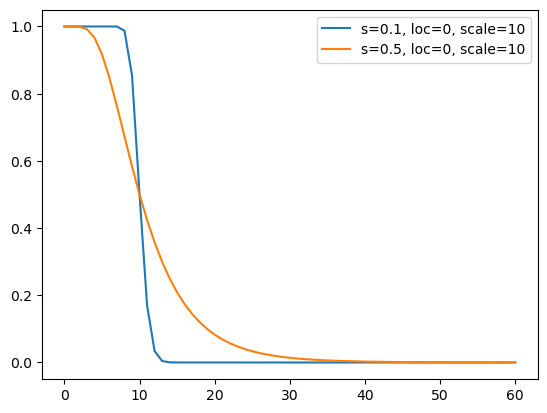

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html#scipy.stats.lognorm

curve_surv_1 = lognorm.sf(
    timesteps,
    s=0.1,  # controls the shape of the curve (skewness)
    loc=0,  # shifts the curve along the x-axis (starting point)
    scale=10,  # controls the stretch of the distribution
)

curve_surv_2 = lognorm.sf(
    timesteps,
    s=0.5,  # controls the shape of the curve (skewness)
    loc=0,  # shifts the curve along the x-axis (starting point)
    scale=10,  # controls the stretch of the distribution
)

# Compare the two survival curves
pd.DataFrame({"s=0.1, loc=0, scale=10": curve_surv_1, "s=0.5, loc=0, scale=10": curve_surv_2}).plot()

<Axes: >

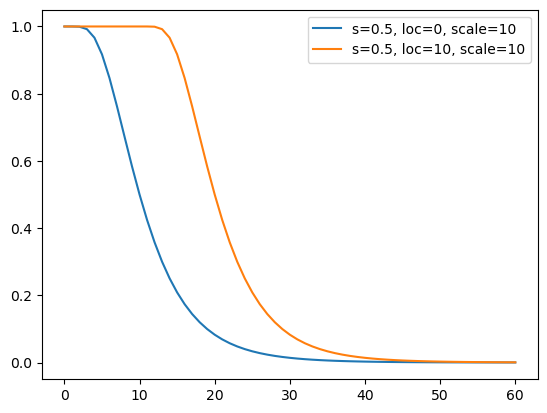

In [62]:
curve_surv_1 = lognorm.sf(
    timesteps,
    s=0.5,  # controls the shape of the curve (skewness)
    loc=0,  # shifts the curve along the x-axis (starting point)
    scale=10,  # controls the stretch of the distribution
)

curve_surv_2 = lognorm.sf(
    timesteps,
    s=0.5,  # controls the shape of the curve (skewness)
    loc=10,  # shifts the curve along the x-axis (starting point)
    scale=10,  # controls the stretch of the distribution
)

# Compare the two survival curves
pd.DataFrame({"s=0.5, loc=0, scale=10": curve_surv_1, "s=0.5, loc=10, scale=10": curve_surv_2}).plot()

<Axes: >

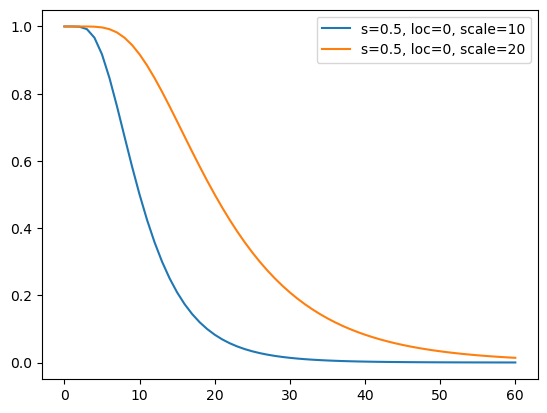

In [63]:
curve_surv_1 = lognorm.sf(
    timesteps,
    s=0.5,  # controls the shape of the curve (skewness)
    loc=0,  # shifts the curve along the x-axis (starting point)
    scale=10,  # controls the stretch of the distribution
)

curve_surv_2 = lognorm.sf(
    timesteps,
    s=0.5,  # controls the shape of the curve (skewness)
    loc=0,  # shifts the curve along the x-axis (starting point)
    scale=20,  # controls the stretch of the distribution
)

# Compare the two survival curves
pd.DataFrame({"s=0.5, loc=0, scale=10": curve_surv_1, "s=0.5, loc=0, scale=20": curve_surv_2}).plot()

**ANSWER**


**4. What do the numbers on the y-axis of the plots below represent?**

The numbers on the y-axis of the plot represent the survival probabilities at each time step of the initial inflow/stock. The values range from 1 (100% survival) at the start to lower probabilities as time progresses.


# More information and tips


- [Statistical functions in scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html)
- the `enumerate()` function on [W3school](https://www.w3schools.com/python/ref_func_enumerate.asp) or [Programiz](https://www.programiz.com/python-programming/methods/built-in/enumerate)
